In [2]:
import pandas as pd 
import numpy as np 

In [2]:
import pandas as pd

# Load the DataFrames with corrected paths
df = pd.read_csv(r"D:\vs_MT\IV_data\New_kd_data\kd_2025\KD_2025.csv", encoding='utf-8', encoding_errors='ignore')
df21 = pd.read_csv(r"IV_data\New_kd_data\kd_2024\Kd_2024,1.csv", encoding='utf-8', encoding_errors='ignore')
df22 = pd.read_csv(r"IV_data\New_kd_data\kd_2024\kd_2024,2.csv", encoding='utf-8', encoding_errors='ignore')
df31 = pd.read_csv(r"IV_data\New_kd_data\kd_2023\kd_2023.1.csv", encoding='utf-8', encoding_errors='ignore')
df32 = pd.read_csv(r"IV_data\New_kd_data\kd_2023\kd_2023.2.csv", encoding='utf-8', encoding_errors='ignore')
df4 = pd.read_csv(r"IV_data\New_kd_data\kd_2022\kd_2022.csv", encoding='utf-8', encoding_errors='ignore')

C:\Users\VIP\AppData\Local\Temp\ipykernel_17860\1365284387.py:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\vs_MT\IV_data\New_kd_data\kd_2025\KD_2025.csv", encoding='utf-8', encoding_errors='ignore')
C:\Users\VIP\AppData\Local\Temp\ipykernel_17860\1365284387.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df21 = pd.read_csv(r"IV_data\New_kd_data\kd_2024\Kd_2024,1.csv", encoding='utf-8', encoding_errors='ignore')
C:\Users\VIP\AppData\Local\Temp\ipykernel_17860\1365284387.py:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df22 = pd.read_csv(r"IV_data\New_kd_data\kd_2024\kd_2024,2.csv", encoding='utf-8', encoding_errors='ignore')
C:\Users\VIP\AppData\Local\Temp\ipykernel_17860\1365284387.py:7: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False

In [3]:
columns = df.columns
df21 = df21.reindex(columns=columns)
df22 = df22.reindex(columns=columns)
df31 = df31.reindex(columns=columns)
df32 = df32.reindex(columns=columns)
df4  = df4.reindex(columns=columns)

In [4]:
df_com = pd.concat([df, df21, df22, df31, df32, df4], ignore_index=True)
print(df_com.shape)
#print(df_com.head())


(2293634, 31)


In [5]:
pd.set_option('display.max_columns', None)
df_com.head()

,pvsnr,vsnr,vm,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,STORNGRD,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND
0,1012851,01012851-007,00 000 0101,Aktiv,1,1,VK,01.01.2025,NaN,89.0,11.05.1977,V,NaN,597.77,0.0,0,0,0,23.85,15.23,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"149,44",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553
1,1012851,01012851-007,00 000 0101,Aktiv,1,1,KH,01.01.2025,NaN,89.0,11.05.1977,V,NaN,217.15,0.0,0,0,0,9.41,4.57,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"54,29",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553
2,1013051,01013051-006,00 000 4305,Aktiv,1,1,VK,01.01.2025,NaN,89.0,17.07.1973,M,NaN,458.25,0.0,0,0,0,10.34,13.16,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"114,56",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000
3,1013051,01013051-006,00 000 4305,Aktiv,1,1,KH,01.01.2025,NaN,89.0,17.07.1973,M,NaN,236.1,0.0,0,0,0,6.75,6.55,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"59,03",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000
4,1020887,01020887-007,00 000 0119,Aktiv,1,1,KH,01.03.2025,NaN,30.0,10.02.1967,V,NaN,39.3,0.0,0,0,0,0.57,0.28,70270/ Privatkunden,Bel,24401,92.0,71295/ Herr,"3,28",NINGBO,901.0,NaN,N,NaN


In [6]:
df_com.duplicated().sum()

np.int64(0)

In [7]:
numeric_df = df_com.select_dtypes(include=['int64', 'float64'])

<Axes: >

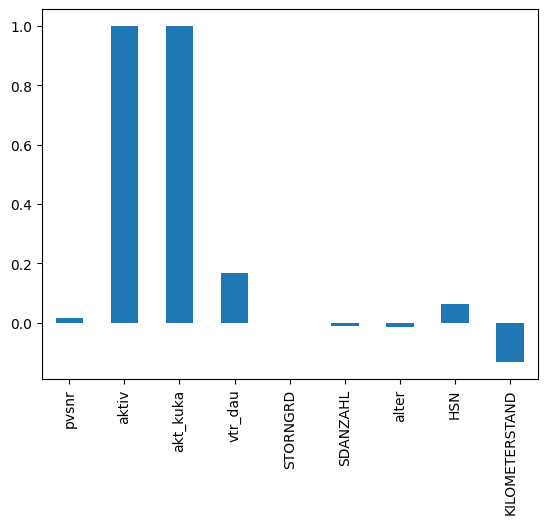

In [8]:
numeric_df.corr()['aktiv'].plot(kind='bar')

In [9]:
df_com['end_date'] = pd.to_datetime(df_com['datum_s'], format='%d.%m.%Y')
df_com['end_year'] = df_com['end_date'].dt.year
df_com['end_month'] = df_com['end_date'].dt.month
df_com['end_day'] = df_com['end_date'].dt.day


In [10]:
df_com['beg_date'] = pd.to_datetime(df_com['beginn'], format='%d.%m.%Y')
df_com['beg_year'] = df_com['beg_date'].dt.year
df_com['beg_month'] = df_com['beg_date'].dt.month
df_com['beg_day'] = df_com['beg_date'].dt.day

In [11]:
#import pandas as pd
#pd.set_option('display.max_columns', None)  # Show all columns
#print(df.head())  # Now all columns will be visible

In [12]:
df_com.vtrweg.unique()

array(['V', 'M', 'S', 'D'], dtype=object)

In [13]:
df_com.spartek.replace({'VK':1, 'KH':2, 'TK':3},inplace=True)

C:\Users\VIP\AppData\Local\Temp\ipykernel_17860\3946926450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_com.spartek.replace({'VK':1, 'KH':2, 'TK':3},inplace=True)
C:\Users\VIP\AppData\Local\Temp\ipykernel_17860\3946926450.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_com.spartek.r

In [14]:
df_com.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)

C:\Users\VIP\AppData\Local\Temp\ipykernel_17860\2256135709.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_com.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)


In [15]:
df_com[['gfeld_c','gfeld_n']]= df_com['gfeld'].str.split('/',expand=True)

In [16]:
df_com['ort_id'] = pd.factorize(df_com['ort'])[0]+1
print(df_com[['ort','ort_id']])

               ort  ort_id
0             Holt       1
1             Holt       1
2        Flensburg       2
3        Flensburg       2
4              Bel       3
...            ...     ...
2293629   Gammelby    1339
2293630    Blowatz    9550
2293631    Blowatz    9550
2293632  Stralsund    1017
2293633  Stralsund    1017

[2293634 rows x 2 columns]


In [17]:
df_com[['anr_no','anr_1']]= df_com['anr'].str.split('/',expand=True)

In [18]:
df_com.head()

,pvsnr,vsnr,vm,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,STORNGRD,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND,end_date,end_year,end_month,end_day,beg_date,beg_year,beg_month,beg_day,gfeld_c,gfeld_n,ort_id,anr_no,anr_1
0,1012851,01012851-007,00 000 0101,Aktiv,1,1,1,01.01.2025,NaN,89.0,11.05.1977,1,NaN,597.77,0.0,0,0,0,23.85,15.23,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"149,44",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,1,71295,Herr
1,1012851,01012851-007,00 000 0101,Aktiv,1,1,2,01.01.2025,NaN,89.0,11.05.1977,1,NaN,217.15,0.0,0,0,0,9.41,4.57,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"54,29",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,1,71295,Herr
2,1013051,01013051-006,00 000 4305,Aktiv,1,1,1,01.01.2025,NaN,89.0,17.07.1973,2,NaN,458.25,0.0,0,0,0,10.34,13.16,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"114,56",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,2,71296,Frau
3,1013051,01013051-006,00 000 4305,Aktiv,1,1,2,01.01.2025,NaN,89.0,17.07.1973,2,NaN,236.1,0.0,0,0,0,6.75,6.55,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"59,03",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,2,71296,Frau
4,1020887,01020887-007,00 000 0119,Aktiv,1,1,2,01.03.2025,NaN,30.0,10.02.1967,1,NaN,39.3,0.0,0,0,0,0.57,0.28,70270/ Privatkunden,Bel,24401,92.0,71295/ Herr,"3,28",NINGBO,901.0,NaN,N,NaN,NaT,NaN,NaN,NaN,2025-03-01,2025,3,1,70270,Privatkunden,3,71295,Herr


In [19]:
df_com['gender_id'] = pd.factorize(df_com['anr_no'])[0]+1


In [20]:
df_com['plz_id'] = pd.factorize(df_com['plz'])[0]+1


In [21]:
df_com.gender_id.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [22]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#plt.figure(figsize=(13, 13))
# Create heatmap
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# Add title
#plt.title('Correlation Heatmap of Iris Dataset')
# Display the plot
#plt.show()

In [24]:
df_com.ort.isnull().sum()

np.int64(51)

In [25]:
#df_com['end_date'] = pd.to_datetime(df_com['datum_s'], format='%d.%m.%Y')
dd = pd.DataFrame(df_com)
print(dd['plz'].dtypes)

object


In [26]:
import pandas as pd


def convert_postcode_to_int(df, column):
    try:
        # Step 1: Ensure the column is string to handle object type
        df[column] = df[column].astype(str).str.strip()
        
        # Step 2: Handle non-numeric or invalid values
        # Replace non-numeric or empty strings with NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')
        
        # Step 4: Convert to integer (this will drop decimal points if any)
        df[column] = df[column].astype('Int64')  # Use Int64 to handle NaN values
        
        print(f"Successfully converted '{column}' to integer.")
        return df
    except Exception as e:
        print(f"Error converting '{column}' to integer: {e}")
        return df

#Apply the conversion to your DataFrame (replace merged_df with your DataFrame if needed)
#merged_df = convert_postcode_to_int(df_com, postcode_column)



In [27]:
convert_postcode_to_int(df_com,'plz')
print(df_com['plz'].dtype)

Successfully converted 'plz' to integer.
Int64


In [28]:
convert_postcode_to_int(df_com,'anr_no')
convert_postcode_to_int(df_com,'gfeld_c')

Successfully converted 'anr_no' to integer.
Successfully converted 'gfeld_c' to integer.


,pvsnr,vsnr,vm,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,STORNGRD,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND,end_date,end_year,end_month,end_day,beg_date,beg_year,beg_month,beg_day,gfeld_c,gfeld_n,ort_id,anr_no,anr_1,gender_id,plz_id
0,1012851,01012851-007,00 000 0101,Aktiv,1,1,1,01.01.2025,NaN,89.000,11.05.1977,1,NaN,597.77,0.0,0,0,0,23.85,15.23,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"149,44",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,1,71295,Herr,1,1
1,1012851,01012851-007,00 000 0101,Aktiv,1,1,2,01.01.2025,NaN,89.000,11.05.1977,1,NaN,217.15,0.0,0,0,0,9.41,4.57,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"54,29",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,1,71295,Herr,1,1
2,1013051,01013051-006,00 000 4305,Aktiv,1,1,1,01.01.2025,NaN,89.000,17.07.1973,2,NaN,458.25,0.0,0,0,0,10.34,13.16,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"114,56",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,2,71296,Frau,2,2
3,1013051,01013051-006,00 000 4305,Aktiv,1,1,2,01.01.2025,NaN,89.000,17.07.1973,2,NaN,236.1,0.0,0,0,0,6.75,6.55,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"59,03",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,2,71296,Frau,2,2
4,1020887,01020887-007,00 000 0119,Aktiv,1,1,2,01.03.2025,NaN,30.000,10.02.1967,1,NaN,39.3,0.0,0,0,0,0.57,0.28,70270/ Privatkunden,Bel,24401,92.0,71295/ Herr,"3,28",NINGBO,901.0,NaN,N,NaN,NaT,NaN,NaN,NaN,2025-03-01,2025,3,1,70270,Privatkunden,3,71295,Herr,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293629,99934072,99934072-011,00 000 0318,Storno,0,0,2,13.04.2022,25.03.2024,712.000,31.12.1980,1,36.0,"35,79",0.0,"0,00","0,00","0,00","11,23","5,29",70269/ Land- und Forstwirtschaft,Gammelby,24340,63.0,71295/ Herr,"63,87",STANDART MOTOR (RC)R,901.0,000,N,NaN,2024-03-25,2024.0,3.0,25.0,2022-04-13,2022,4,13,70269,Land- und Forstwirtschaft,1339,71295,Herr,1,41
2293630,99934342,99934342-002,00 000 6255,Storno,0,0,1,15.11.2022,31.12.2023,411.000,01.08.1996,2,998.0,"0,00",0.0,"0,00","0,00","0,00","67,12","68,19",70269/ Land- und Forstwirtschaft,Blowatz,23974,57.0,71295/ Herr,"603,64",BMW BAYERISCHE MOTORENWER,5.0,CRX,N,NaN,2023-12-31,2023.0,12.0,31.0,2022-11-15,2022,11,15,70269,Land- und Forstwirtschaft,9550,71295,Herr,1,4387
2293631,99934342,99934342-002,00 000 6255,Aktiv,1,1,2,15.11.2022,NaN,867.000,01.08.1996,2,NaN,"176,12",0.0,"0,00","0,00","0,00","28,84","26,19",70269/ Land- und Forstwirtschaft,Blowatz,23974,57.0,71295/ Herr,"242,39",BMW BAYERISCHE MOTORENWER,5.0,CRX,N,NaN,NaT,NaN,NaN,NaN,2022-11-15,2022,11,15,70269,Land- und Forstwirtschaft,9550,71295,Herr,1,4387
2293632,99934571,99934571-001,00 000 6212,Aktiv,1,1,1,01.01.2022,NaN,1.185,01.01.1997,2,NaN,"167,20",0.0,"0,00","0,00","0,00","54,52","58,05",70270/ Privatkunden,Stralsund,18435,60.0,71296/ Frau,"514,70",SUZUKI (J),8306.0,ABS,N,153.600,NaT,NaN,NaN,NaN,2022-01-01,2022,1,1,70270,Privatkunden,1017,71296,Frau,2,952


In [37]:
numeric_df = df_com.select_dtypes(include=['int64','float64','int32'])
numeric_df.head()

,pvsnr,aktiv,akt_kuka,spartek,vtr_dau,vtrweg,STORNGRD,SDANZAHL,plz,alter,HSN,KILOMETERSTAND,end_year,end_month,end_day,beg_year,beg_month,beg_day,gfeld_c,ort_id,anr_no,gender_id,plz_id,Customer_beg_year,Customer_beg_month,Customer_beg_day,Electric
0,1012851,1,1,1,89.0,1,NaN,0.0,24994,72.0,5.0,246.553,NaN,NaN,NaN,2025,1,1,70271,1,71295,1,1,1977.0,5.0,11.0,1
1,1012851,1,1,2,89.0,1,NaN,0.0,24994,72.0,5.0,246.553,NaN,NaN,NaN,2025,1,1,70271,1,71295,1,1,1977.0,5.0,11.0,1
2,1013051,1,1,1,89.0,2,NaN,0.0,24944,74.0,5.0,18.000,NaN,NaN,NaN,2025,1,1,70271,2,71296,2,2,1973.0,7.0,17.0,1
3,1013051,1,1,2,89.0,2,NaN,0.0,24944,74.0,5.0,18.000,NaN,NaN,NaN,2025,1,1,70271,2,71296,2,2,1973.0,7.0,17.0,1
4,1020887,1,1,2,30.0,1,NaN,0.0,24401,92.0,901.0,NaN,NaN,NaN,NaN,2025,3,1,70270,3,71295,1,3,1967.0,2.0,10.0,1


<Axes: >

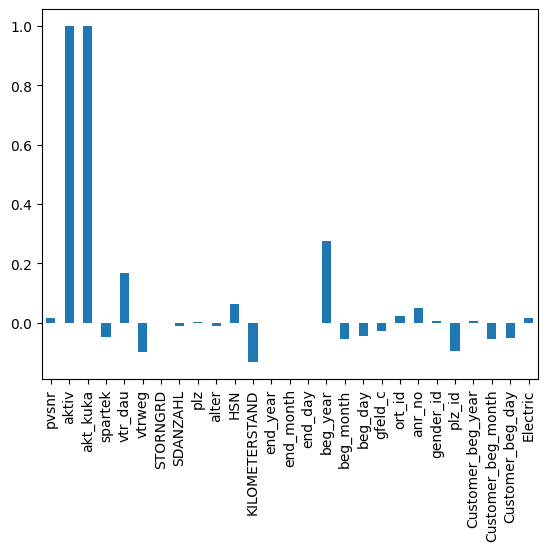

In [38]:
numeric_df.corr()['aktiv'].plot(kind='bar')

In [31]:
df_new = df_com

In [32]:
df_com['Customer_beg_since'] = pd.to_datetime(df_com['kund_beg'], format='%d.%m.%Y')
df_com['Customer_beg_year'] = df_com['Customer_beg_since'].dt.year
df_com['Customer_beg_month'] = df_com['Customer_beg_since'].dt.month
df_com['Customer_beg_day'] = df_com['Customer_beg_since'].dt.day

In [33]:
df_com.head()

,pvsnr,vsnr,vm,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,STORNGRD,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND,end_date,end_year,end_month,end_day,beg_date,beg_year,beg_month,beg_day,gfeld_c,gfeld_n,ort_id,anr_no,anr_1,gender_id,plz_id,Customer_beg_since,Customer_beg_year,Customer_beg_month,Customer_beg_day
0,1012851,01012851-007,00 000 0101,Aktiv,1,1,1,01.01.2025,NaN,89.0,11.05.1977,1,NaN,597.77,0.0,0,0,0,23.85,15.23,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"149,44",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,1,71295,Herr,1,1,1977-05-11,1977.0,5.0,11.0
1,1012851,01012851-007,00 000 0101,Aktiv,1,1,2,01.01.2025,NaN,89.0,11.05.1977,1,NaN,217.15,0.0,0,0,0,9.41,4.57,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"54,29",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,1,71295,Herr,1,1,1977-05-11,1977.0,5.0,11.0
2,1013051,01013051-006,00 000 4305,Aktiv,1,1,1,01.01.2025,NaN,89.0,17.07.1973,2,NaN,458.25,0.0,0,0,0,10.34,13.16,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"114,56",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,2,71296,Frau,2,2,1973-07-17,1973.0,7.0,17.0
3,1013051,01013051-006,00 000 4305,Aktiv,1,1,2,01.01.2025,NaN,89.0,17.07.1973,2,NaN,236.1,0.0,0,0,0,6.75,6.55,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"59,03",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,2,71296,Frau,2,2,1973-07-17,1973.0,7.0,17.0
4,1020887,01020887-007,00 000 0119,Aktiv,1,1,2,01.03.2025,NaN,30.0,10.02.1967,1,NaN,39.3,0.0,0,0,0,0.57,0.28,70270/ Privatkunden,Bel,24401,92.0,71295/ Herr,"3,28",NINGBO,901.0,NaN,N,NaN,NaT,NaN,NaN,NaN,2025-03-01,2025,3,1,70270,Privatkunden,3,71295,Herr,1,3,1967-02-10,1967.0,2.0,10.0


In [34]:
df_com['Electric'] = pd.factorize(df_com['ELEKTRO'])[0]+1


In [35]:
df_new = df_com[[
    'pvsnr', 'vsnr', 'vm', 'aktiv', 'spartek', 'vtr_dau', 'vtrweg', 'STORNGRD',
    'gesbeitr', 'SDANZAHL', 'SCHAGESA', 'KOSTGESA', 'KOSTGEKA', 'kosten_verw',
    'kosten_prov', 'plz', 'alter', 'anr', 'SDBEITR5', 'HSN', 'TSN', 'KILOMETERSTAND',
    'end_date', 'end_year', 'end_month', 'end_day', 'beg_date', 'beg_year',
    'beg_month', 'beg_day', 'gfeld_c', 'ort_id', 'anr_no', 'anr_1', 'gender_id',
    'plz_id', 'Customer_beg_year', 'Customer_beg_month', 'Customer_beg_day', 'Electric'
]]

In [36]:
#anr drop

In [39]:
df_com.head()

,pvsnr,vsnr,vm,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,STORNGRD,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND,end_date,end_year,end_month,end_day,beg_date,beg_year,beg_month,beg_day,gfeld_c,gfeld_n,ort_id,anr_no,anr_1,gender_id,plz_id,Customer_beg_since,Customer_beg_year,Customer_beg_month,Customer_beg_day,Electric
0,1012851,01012851-007,00 000 0101,Aktiv,1,1,1,01.01.2025,NaN,89.0,11.05.1977,1,NaN,597.77,0.0,0,0,0,23.85,15.23,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"149,44",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,1,71295,Herr,1,1,1977-05-11,1977.0,5.0,11.0,1
1,1012851,01012851-007,00 000 0101,Aktiv,1,1,2,01.01.2025,NaN,89.0,11.05.1977,1,NaN,217.15,0.0,0,0,0,9.41,4.57,70271/ Selbstndige,Holt,24994,72.0,71295/ Herr,"54,29",BMW BAYERISCHE MOTORENWER,5.0,BKU,N,246.553,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,1,71295,Herr,1,1,1977-05-11,1977.0,5.0,11.0,1
2,1013051,01013051-006,00 000 4305,Aktiv,1,1,1,01.01.2025,NaN,89.0,17.07.1973,2,NaN,458.25,0.0,0,0,0,10.34,13.16,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"114,56",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,2,71296,Frau,2,2,1973-07-17,1973.0,7.0,17.0,1
3,1013051,01013051-006,00 000 4305,Aktiv,1,1,2,01.01.2025,NaN,89.0,17.07.1973,2,NaN,236.1,0.0,0,0,0,6.75,6.55,70271/ Selbstndige,Flensburg,24944,74.0,71296/ Frau,"59,03",BMW BAYERISCHE MOTORENWER,5.0,CZT,N,18.000,NaT,NaN,NaN,NaN,2025-01-01,2025,1,1,70271,Selbstndige,2,71296,Frau,2,2,1973-07-17,1973.0,7.0,17.0,1
4,1020887,01020887-007,00 000 0119,Aktiv,1,1,2,01.03.2025,NaN,30.0,10.02.1967,1,NaN,39.3,0.0,0,0,0,0.57,0.28,70270/ Privatkunden,Bel,24401,92.0,71295/ Herr,"3,28",NINGBO,901.0,NaN,N,NaN,NaT,NaN,NaN,NaN,2025-03-01,2025,3,1,70270,Privatkunden,3,71295,Herr,1,3,1967-02-10,1967.0,2.0,10.0,1
